In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

In [3]:
airports_data = pd.read_csv('us_airports.csv')

In [4]:
airports_data.head()

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228


In [6]:
airports_data.shape

(340, 7)

In [22]:
# Create Point Geometries using Point - the order of lon and lat is essential
geometry = [Point(xy) for xy in zip(airports_data['LONGITUDE'], airports_data['LATITUDE'])]

In [23]:
type(geometry)

list

<AxesSubplot:>

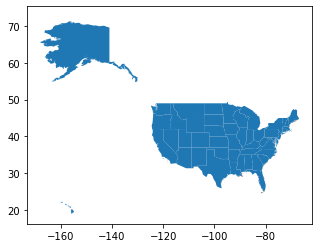

In [24]:
# Importing US states ESRI shapefile and checking its crs
us_states = gpd.read_file('us_states.shp')
us_states.crs
us_states.plot()

In [25]:
# Create a new Geopandas GeoDataFrame with the same crs as the base map - US states
airports_us = gpd.GeoDataFrame(airports_data, geometry = geometry, crs = us_states.crs)

<AxesSubplot:>

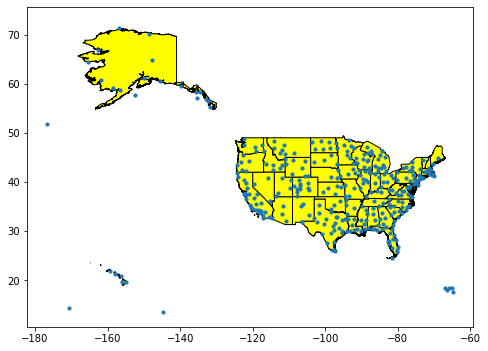

In [27]:
fig, ax = plt.subplots(figsize = (8, 6))
us_states.plot(ax = ax, color ='yellow', edgecolor = 'black')
airports_us.plot(ax = ax, markersize = 10)